In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 导入 tensorflow。mnist 数据集工具包
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# 载入数据集
# 
# 下载 数据集
# 将标签转换为 one_hot 编码形式
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# tensorflow 版本更新,以前的数据集下载等 方法将不再支持,回警告！！！

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 定义迭代次数
epochs = 20

# 定义每次批次的大小
batch_size = 100
# 定义批次次数
n_batch = mnist.train.num_examples // batch_size

# 打印
print(n_batch)

550


In [4]:
# 创建 2 个占位符
x = tf.placeholder(dtype=tf.float32, shape=(None, 784))
y = tf.placeholder(dtype=tf.float32, shape=(None, 10))

In [5]:
# 创建神经网络
# 
# 输入层
weight_L1 = tf.Variable(tf.zeros(shape=(784, 10)))
biase_L1 = tf.Variable(tf.zeros(shape=(1, 10)))
wx_plus_b_L1 = tf.matmul(x, weight_L1) + biase_L1
prediction = tf.nn.softmax(wx_plus_b_L1)

# prediction.shape = (None, 10)
# print(prediction.shape)

In [6]:
# # 中间层
# # 
# # 加上中间层(准确率不高),有可能过拟合
# weight_L2 = tf.Variable(tf.zeros(shape=(100, 10)))
# biase_L2 = tf.Variable(tf.zeros(shape=(1, 10)))
# wx_plus_b_L2 = tf.matmul(L1, weight_L2) + biase_L2

# # 创建输出层
# prediction = tf.nn.softmax(wx_plus_b_L2)

In [7]:
# 损失函数、优化器
# 
# 定义损失函数
# loss = tf.reduce_mean(tf.square(y - prediction))
# 
# 定义损失函数 对数似然代价函数与 soft 组合
# 
# 训练时间、准确度有所提升
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))

# 创建优化器，优化损失函数
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [8]:
# 判断准去率
# 
# tf.equal(x, y),判断 x, y 是否相等，返回 bool 类型 (tensor 里的值为 bool)
# tf.argmax() 查找最大值，返回索引值
# tensor 的轴(是从 0 开始的)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))

# tf.case() 将 bool 类型,转换为 tf.float 类型
# 
# 疑问：acc 为什么 会有 4 位小数，出现呢？(tensor(100, 10), 里面不 1 就是 0)，我怎么感觉顶天就是 2 位小数
# 解答：准确率是测试集，测试的(10000)张照片,固有 4 位小数出现
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(type(correct_prediction))
print(type(accuracy))

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [9]:
# 初始化图中变量
init_op = tf.global_variables_initializer()

Ietr 0  Testing Accuracy 0.825   res_loss= 1.7279522  res_train None
Ietr 1  Testing Accuracy 0.8945   res_loss= 1.5980908  res_train None
Ietr 2  Testing Accuracy 0.9013   res_loss= 1.5760034  res_train None
Ietr 3  Testing Accuracy 0.9053   res_loss= 1.5967703  res_train None
Ietr 4  Testing Accuracy 0.908   res_loss= 1.6068616  res_train None
Ietr 5  Testing Accuracy 0.9105   res_loss= 1.5911851  res_train None
Ietr 6  Testing Accuracy 0.9122   res_loss= 1.5992754  res_train None
Ietr 7  Testing Accuracy 0.9133   res_loss= 1.6184201  res_train None
Ietr 8  Testing Accuracy 0.9138   res_loss= 1.5766654  res_train None
Ietr 9  Testing Accuracy 0.9164   res_loss= 1.5598828  res_train None
Ietr 10  Testing Accuracy 0.9178   res_loss= 1.5442863  res_train None
Ietr 11  Testing Accuracy 0.9194   res_loss= 1.566681  res_train None
Ietr 12  Testing Accuracy 0.9178   res_loss= 1.5741146  res_train None
Ietr 13  Testing Accuracy 0.9194   res_loss= 1.5824434  res_train None
Ietr 14  Testing Ac

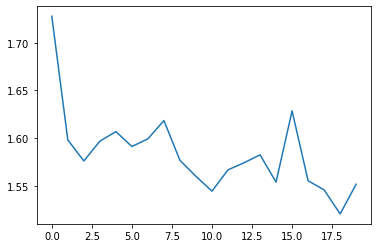

(10000, 784)
<class 'numpy.float32'>


In [10]:
# 创建会话
with tf.Session() as sess:
    sess.run(init_op)
#     定义列表存储 loss
#     迭代 21 个周期
    loss_list = []
    for epoch in range(epochs):
#         执行批次数
        for batch in range(n_batch):
#         一个批次获取照片数 batch_size
            train_x, train_y = mnist.train.next_batch(batch_size=batch_size)
           
#             res_loss 为 loss, res_train ?
            res_loss, res_train = sess.run([loss, train], feed_dict={x: train_x, y: train_y})
        
#         计算网络 准确率
        acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
        
#         将每一次迭代 loss 记录
        loss_list.append(res_loss)
        print('Ietr ' + str(epoch) + '  Testing Accuracy ' + str(acc), '  res_loss=', res_loss, ' res_train', res_train)
        
#   画出 loss-epoch 关系图
    plt.figure()
    plt.plot(list(range(epochs)), loss_list)
    plt.show()
        
    print(mnist.test.images.shape)
    print(type(acc))
    